##Libs

In [1]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor
from sklearn.preprocessing import  StandardScaler
import pandas as pd
import numpy as np
import sys
from IPython.display import Image
from sklearn import tree
import pydotplus
import graphviz
import warnings
warnings.filterwarnings('ignore')

##Load dataset

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
##Decition Tree

In [4]:
trees={
    "DecisionTreeClassifier":DecisionTreeClassifier, #based on entropy reduction
    "DecisionTreeRegressor":DecisionTreeRegressor,
}

In [6]:
class Tree():
    def __init__(self,
                 dataset,
                 random_state=0,
                 tree_type="DecisionTreeClassifier",
                 criterion="entropy",
                 ):

        self.dataset = dataset
        self._setVectors()

        try:
            self.model = trees.get(tree_type)(random_state=random_state,
                                             criterion=criterion
                                            )
            self.model.fit(self.X,self.Y)
        except:
             sys.exit('Some error')

    def _setVectors(self):
        self.X=[np.array(value[:-1]) for value in self.dataset]
        self.Y=[np.array(value[-1]) for value in self.dataset]

        #scaler=StandardScaler()
        #self.X=scaler.fit_transform(self.X)

    def getPredict(self,X):
        return self.model.predict(X)


In [7]:
from sklearn.model_selection import train_test_split
def accuracy_tree(dataset,test_sample=0.2, tree_type="DecisionTreeClassifier",criterion="entropy"):

    X=dataset.data
    Y=dataset.target
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=test_sample)
    train_dataset=np.hstack((X_train,np.resize(Y_train,(len(Y_train),1))))

    predict=Tree(train_dataset, tree_type=tree_type,criterion=criterion)
    #predict.plot_tree(dataset.feature_names,dataset.target_names)
    #sys.exit()

    answer=predict.getPredict(X_test)
    accuracy=sum(int(x == y) for (x, y) in zip(answer,Y_test))

    return accuracy*100/len(X_test)

In [8]:
import matplotlib.pyplot as plt

def test_disition_tree(tree_type="DecisionTreeClassifier",test_sample=0.3,criterions=["entropy"],step=10):
    list_accuracy=[[] for _ in range(len(criterions))]

    for i in range(1,100,step):
        for N,criterion in enumerate(criterions):

            list_accuracy[N].append(accuracy_tree(iris,
                                                   test_sample=test_sample,
                                                   tree_type=tree_type,
                                                   criterion=criterion
                                                   ))

    plt.figure(figsize=(10, 5))
    for N,criterion in enumerate(criterions):
        plt.plot([i*step+1 for i in range(len(list_accuracy[N]))],list_accuracy[N] ,label=criterion, marker='o')

    plt.legend()
    plt.xlabel('test_sample'), plt.ylabel('accuracy')
    plt.title(f'Dependence of the forecast accuracy value on the size of the test sample\n')
    plt.show()

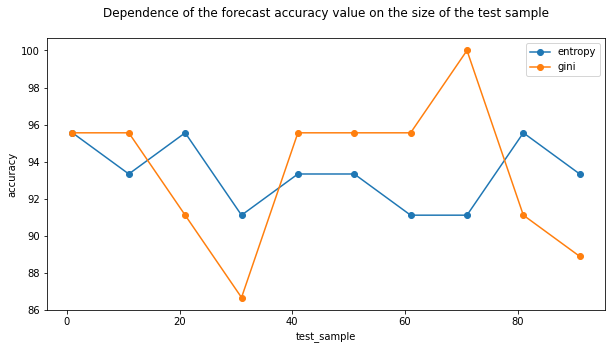

In [9]:
#gini”, “entropy”, “log_loss
test_disition_tree(tree_type="DecisionTreeClassifier",criterions=["entropy","gini"])

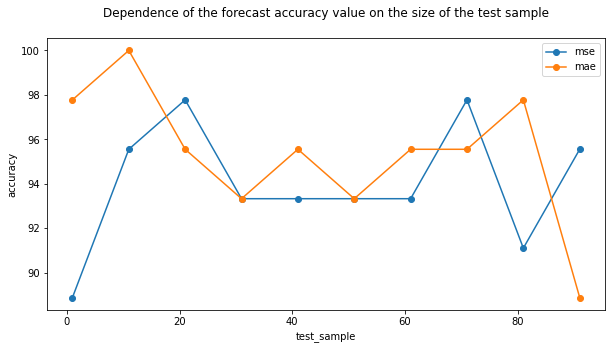

In [10]:
test_disition_tree(tree_type="DecisionTreeRegressor",criterions=["mse","mae"])

##Random Forest

In [11]:
forests={
    "RandomForestClassifier":RandomForestClassifier, #based on entropy reduction
    "RandomForestRegressor":RandomForestRegressor,
}

In [12]:
class Forest(Tree):
    def __init__(self,
                 dataset,
                 random_state=0,
                 tree_type="RandomForestClassifier",
                 criterion="entropy",
                 max_features="sqrt",
                 bootstrap=True,
                 n_estimators=100,
                 ):

        self.dataset = dataset
        self._setVectors()

        try:
            self.model = forests.get(tree_type)(random_state=random_state,
                                                criterion=criterion,
                                                max_features=max_features,
                                                bootstrap=bootstrap,
                                                n_estimators=n_estimators,
                                            )
            self.model.fit(self.X,self.Y)
        except:
             sys.exit('Some error')


In [13]:
from sklearn.model_selection import train_test_split
def accuracy_forest(dataset,test_sample=0.2, tree_type="RandomForestClassifier",criterion="entropy",
                 max_features="sqrt",bootstrap=True,n_estimators=100,):

    X=dataset.data
    Y=dataset.target
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=test_sample)
    train_dataset=np.hstack((X_train,np.resize(Y_train,(len(Y_train),1))))

    predict=Forest(train_dataset, tree_type=tree_type,criterion=criterion,
                   max_features=max_features,bootstrap=bootstrap,n_estimators=n_estimators,)
    #predict.plot_tree(dataset.feature_names,dataset.target_names)
    #sys.exit()

    answer=predict.getPredict(X_test)
    accuracy=sum(int(x == y) for (x, y) in zip(answer,Y_test))

    return accuracy*100/len(X_test)

In [14]:
import matplotlib.pyplot as plt

def test_random_tree_by_criterions(tree_type="RandomForestClassifier",test_sample=0.3,criterions=["entropy"],step=10):
    list_accuracy=[[] for _ in range(len(criterions))]

    for i in range(1,100,step):
        for N,criterion in enumerate(criterions):

            list_accuracy[N].append(accuracy_forest(iris,
                                                   test_sample=test_sample,
                                                   tree_type=tree_type,
                                                   criterion=criterion
                                                   ))

    plt.figure(figsize=(10, 5))
    for N,criterion in enumerate(criterions):
        plt.plot([i*step+1 for i in range(len(list_accuracy[N]))],list_accuracy[N] ,label=criterion, marker='o')

    plt.legend()
    plt.xlabel('test_sample'), plt.ylabel('accuracy')
    plt.title(f'Dependence of the forecast accuracy value on the size of the test sample\n')
    plt.show()

def test_random_tree_by_bootstrap(tree_type="RandomForestClassifier",bootstraps=[True,False],test_sample=0.3,step=10):
    list_accuracy=[[] for _ in range(len(bootstraps))]

    for i in range(1,100,step):
        for N,bootstrap in enumerate(bootstraps):

            list_accuracy[N].append(accuracy_forest(iris,
                                                   test_sample=test_sample,
                                                   tree_type=tree_type,
                                                   bootstrap=bootstrap
                                                   ))

    plt.figure(figsize=(10, 5))
    for N,bootstrap in enumerate(bootstraps):
        plt.plot([i*step+1 for i in range(len(list_accuracy[N]))],list_accuracy[N] ,label=str(bootstrap), marker='o')

    plt.legend()
    plt.xlabel('test_sample'), plt.ylabel('accuracy')
    plt.title(f'Dependence of the forecast accuracy value on the size of the test sample\n')
    plt.show()

def test_random_tree_by_max_features(tree_type="RandomForestClassifier",max_features_s=["sqrt", "log2", None],test_sample=0.3,step=10):
    list_accuracy=[[] for _ in range(len(max_features_s))]

    for i in range(1,100,step):
        for N,max_features in enumerate(max_features_s):

            list_accuracy[N].append(accuracy_forest(iris,
                                                   test_sample=test_sample,
                                                   tree_type=tree_type,
                                                   max_features=max_features,
                                                   ))

    plt.figure(figsize=(10, 5))
    for N,max_features in enumerate(max_features_s):
        plt.plot([i*step+1 for i in range(len(list_accuracy[N]))],list_accuracy[N] ,label=str(max_features), marker='o')

    plt.legend()
    plt.xlabel('test_sample'), plt.ylabel('accuracy')
    plt.title(f'Dependence of the forecast accuracy value on the size of the test sample\n')
    plt.show()

def test_random_tree_by_n_estimators(tree_type="RandomForestClassifier",n_estimators_s=[10, 50, 100],test_sample=0.3,step=10):
    list_accuracy=[[] for _ in range(len(n_estimators_s))]

    for i in range(1,100,step):
        for N,n_estimators in enumerate(n_estimators_s):

            list_accuracy[N].append(accuracy_forest(iris,
                                                   test_sample=test_sample,
                                                   tree_type=tree_type,
                                                   n_estimators=n_estimators,
                                                   ))

    plt.figure(figsize=(10, 5))
    for N,n_estimators in enumerate(n_estimators_s):
        plt.plot([i*step+1 for i in range(len(list_accuracy[N]))],list_accuracy[N] ,label=str(n_estimators), marker='o')

    plt.legend()
    plt.xlabel('test_sample'), plt.ylabel('accuracy')
    plt.title(f'Dependence of the forecast accuracy value on the size of the test sample\n')
    plt.show()

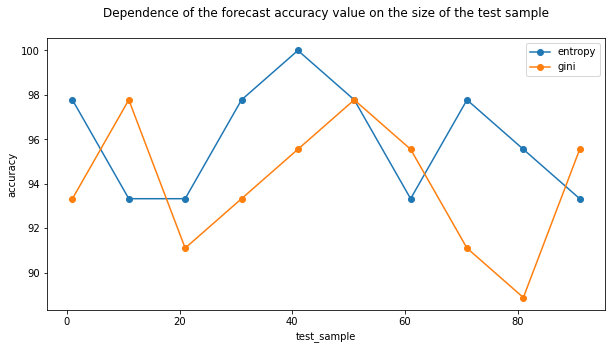

In [15]:
test_random_tree_by_criterions(tree_type="RandomForestClassifier",criterions=["entropy","gini"])

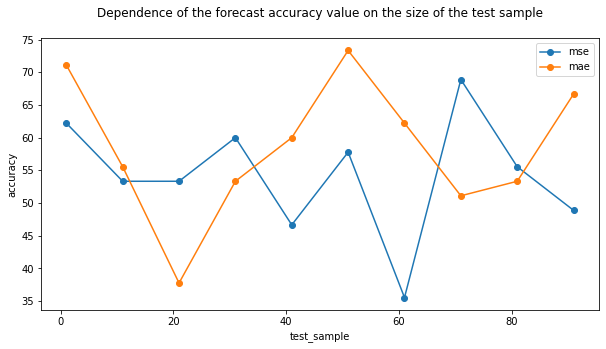

In [16]:
test_random_tree_by_criterions(tree_type="RandomForestRegressor",criterions=["mse","mae"])

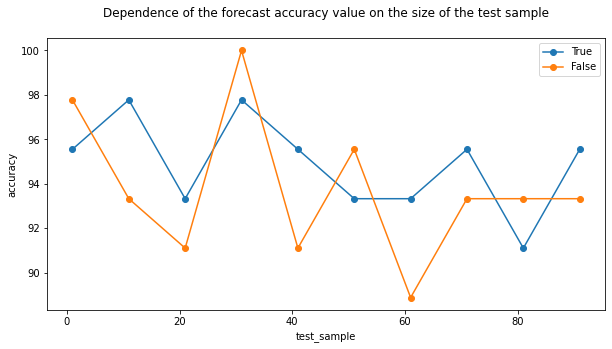

In [17]:
test_random_tree_by_bootstrap(tree_type="RandomForestClassifier")

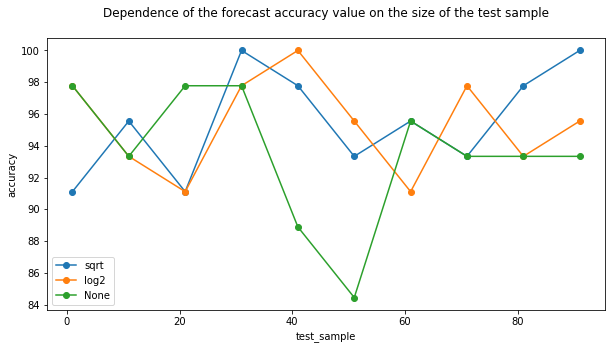

In [18]:
test_random_tree_by_max_features(tree_type="RandomForestClassifier")

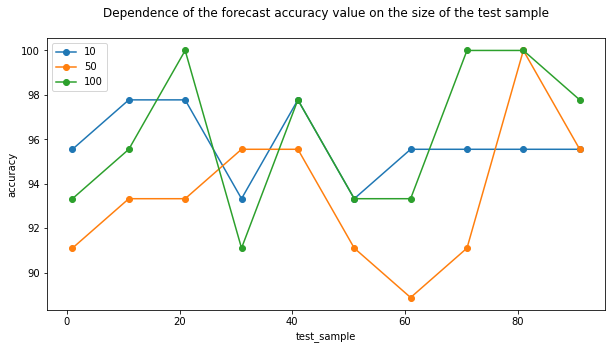

In [19]:
test_random_tree_by_n_estimators(tree_type="RandomForestClassifier")

##boosting

In [20]:
boost={
    "AdaBoostRegressor":AdaBoostRegressor, #based on entropy reduction
    "AdaBoostClassifier":AdaBoostClassifier,
}

In [21]:
class Boosting(Tree):
    def __init__(self,
                 dataset,
                 random_state=0,
                 tree_type="AdaBoostClassifier",
                 n_estimators=50,
                 loss="linear",
                 learning_rate=1.0,#float, default=1.0
                 #{‘linear’, ‘square’, ‘exponential’}, default=’linear’
                 ):

        self.dataset = dataset
        self._setVectors()

        #try:
        self.model = boost.get(tree_type)(random_state=random_state,
                                              n_estimators=n_estimators,
                                              learning_rate=learning_rate,
                                              loss=loss
                                              )
        self.model.fit(self.X,self.Y)
        #except:
            #sys.exit()



In [22]:
from sklearn.model_selection import train_test_split
def accuracy_boosting(dataset,test_sample=0.2, tree_type="AdaBoostRegressor",
                 n_estimators=50,loss="linear",learning_rate=1.0,):

    X=dataset.data
    Y=dataset.target
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=test_sample)
    train_dataset=np.hstack((X_train,np.resize(Y_train,(len(Y_train),1))))

    predict=Boosting(train_dataset, tree_type=tree_type,n_estimators=n_estimators,
                   loss=loss,learning_rate=learning_rate,)
    #predict.plot_tree(dataset.feature_names,dataset.target_names)
    #sys.exit()

    answer=predict.getPredict(X_test)
    accuracy=sum(int(x == y) for (x, y) in zip(answer,Y_test))

    return accuracy*100/len(X_test)

In [23]:
def test_boosting_by_loss(tree_type="AdaBoostRegressor",loss_s=["linear", "square", "exponential"]
                                  ,test_sample=0.3,step=10):
    list_accuracy=[[] for _ in range(len(loss_s))]

    for i in range(1,100,step):
        for N,loss in enumerate(loss_s):

            list_accuracy[N].append(accuracy_boosting(iris,
                                                   test_sample=test_sample,
                                                   tree_type=tree_type,
                                                   loss=loss,
                                                   ))

    plt.figure(figsize=(10, 5))
    for N,loss in enumerate(loss_s):
        plt.plot([i*step+1 for i in range(len(list_accuracy[N]))],list_accuracy[N] ,label=str(loss), marker='o')

    plt.legend()
    plt.xlabel('test_sample'), plt.ylabel('accuracy')
    plt.title(f'Dependence of the forecast accuracy value on the size of the test sample\n')
    plt.show()


def test_boosting_by_learning_rate(tree_type="AdaBoostRegressor",learning_rate_s=[0.1, 0.5, 1]
                                  ,test_sample=0.3,step=10):
    list_accuracy=[[] for _ in range(len(learning_rate_s))]

    for i in range(1,100,step):
        for N,learning_rate in enumerate(learning_rate_s):

            list_accuracy[N].append(accuracy_boosting(iris,
                                                   test_sample=test_sample,
                                                   tree_type=tree_type,
                                                   learning_rate=learning_rate,
                                                   ))

    plt.figure(figsize=(10, 5))
    for N,learning_rate in enumerate(learning_rate_s):
        plt.plot([i*step+1 for i in range(len(list_accuracy[N]))],list_accuracy[N] ,label=str(learning_rate), marker='o')

    plt.legend()
    plt.xlabel('test_sample'), plt.ylabel('accuracy')
    plt.title(f'Dependence of the forecast accuracy value on the size of the test sample\n')
    plt.show()

def test_boosting_by_n_estimators(tree_type="AdaBoostRegressor",n_estimators_s=[10, 50, 100]
                                  ,test_sample=0.3,step=10):
    list_accuracy=[[] for _ in range(len(n_estimators_s))]

    for i in range(1,100,step):
        for N,n_estimators in enumerate(n_estimators_s):

            list_accuracy[N].append(accuracy_boosting(iris,
                                                   test_sample=test_sample,
                                                   tree_type=tree_type,
                                                   n_estimators=n_estimators,
                                                   ))

    plt.figure(figsize=(10, 5))
    for N,n_estimators in enumerate(n_estimators_s):
        plt.plot([i*step+1 for i in range(len(list_accuracy[N]))],list_accuracy[N] ,label=str(n_estimators), marker='o')

    plt.legend()
    plt.xlabel('test_sample'), plt.ylabel('accuracy')
    plt.title(f'Dependence of the forecast accuracy value on the size of the test sample\n')
    plt.show()

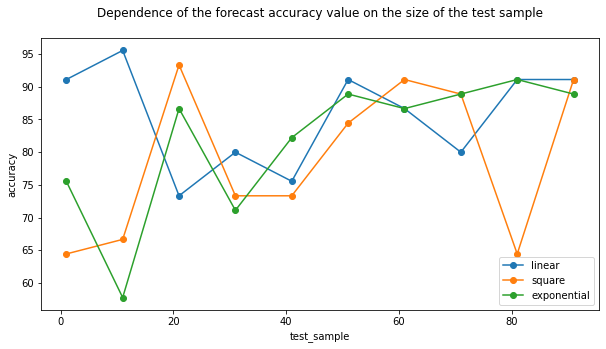

In [24]:
test_boosting_by_loss(tree_type="AdaBoostRegressor")

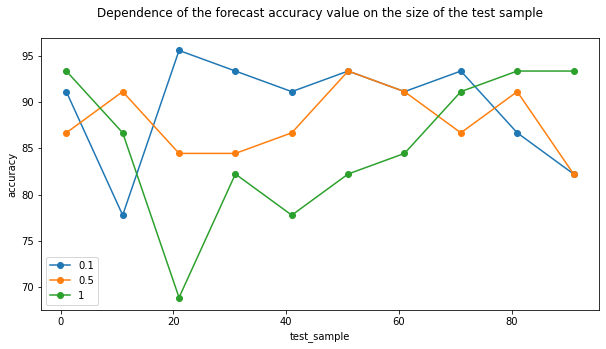

In [181]:
test_boosting_by_learning_rate(tree_type="AdaBoostRegressor")

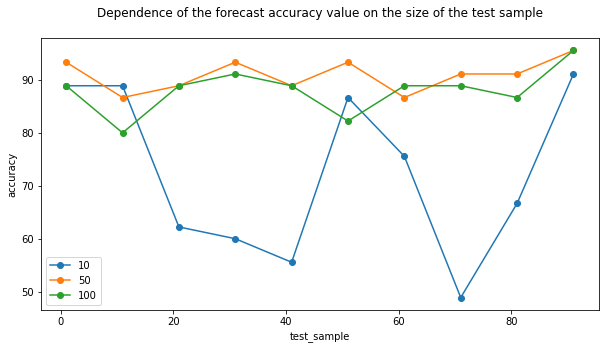

In [25]:
test_boosting_by_n_estimators(tree_type="AdaBoostRegressor")